In [1]:
import PIL.Image as Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import *
from skimage.color import rgb2gray 
from skimage import color, morphology, filters, exposure, feature
import cv2

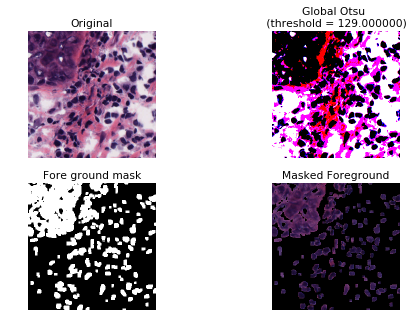

In [58]:
# Otsu thresholding

reg1 = (np.array(Image.open('slideImg1.png')))

threshold_value = filters.threshold_otsu(reg1)

matplotlib.rcParams['font.size'] = 9

img = reg1

img_otsu = img >= threshold_value

fig, ax = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(img_otsu, cmap=plt.cm.gray)
ax2.set_title('Global Otsu \n (threshold = %f)' % threshold_value)
ax2.axis('off')


kernel = np.ones((5,5))
img_otsu = cv2.dilate(img_otsu.astype(np.float32),kernel,iterations =1)
img_otsu = cv2.erode(img_otsu.astype(np.float32),kernel,iterations =1)
lower = np.array([0,0,0])
upper = np.array([0,0,0])
mask = cv2.inRange(img_otsu, lower, upper)
output = cv2.bitwise_and(img_otsu, img_otsu, mask = mask)
fore = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
ax3.imshow(fore, cmap=plt.cm.gray)
ax3.set_title('Fore ground mask')
ax3.axis('off')

binaryMask = fore
binaryMask[binaryMask==255] = 1
maskedImg = np.multiply(binaryMask,img)
ax4.imshow(maskedImg)
ax4.set_title('Masked Foreground')
ax4.axis('off')

plt.show()

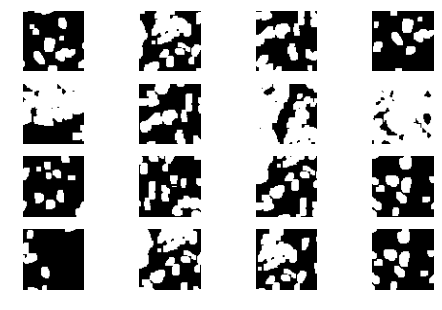

In [3]:
# Get patches?
import numpy as np
from sklearn.feature_extraction import image

one_image = fore

patches = image.extract_patches_2d(one_image, (64, 64), max_patches=16,random_state=0)
#patches = image.extract_patches_2d(one_image, (2, 2))
fig, ax = plt.subplots(4, 4, figsize=(8, 5), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

i = 0
for ax in ax.ravel():
    ax.imshow(patches[i], cmap=plt.cm.gray)
    ax.axis('off')
    i = i+1
plt.show()

In [60]:
nucleiRegionArea = (mask[mask==255]).shape[0]
tileArea = mask.size
tileNucleiDensity = float(nucleiRegionArea) / tileArea
print tileNucleiDensity

0.318740844727


In [75]:
perimeterSeparation = np.sum(mask[:,1:] != mask[:,:-1]) + np.sum(mask[1:,:] != mask[:-1,:])
print perimeterSeparation

5723


In [107]:
sumNucleiIntensityValues = np.array([np.sum(maskedImg[:,:,0]),np.sum(maskedImg[:,:,1]),np.sum(maskedImg[:,:,2])])
numNucleiIntensityValues = (mask[mask==255]).shape[0]
avgNucleiIntensityValues = sumNucleiIntensityValues / float(numNucleiIntensityValues)
print avgNucleiIntensityValues

[ 68.91000048  35.22873283  83.85169228]
